In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.pricer.black_scholes_pricer import*

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# References
# https://www.wilmott.com/wp-content/uploads/2016/07/111116_bossu.pdf
# Steps outlined here -> https://github.com/yhilpisch/lvvd/blob/master/lvvd/03_Model_free_Replication.ipynb
# http://www.fincad.com/resources/resource-library/article/valuation-variance-and-volatility-swaps

In [3]:
r = 0.01
T = 252
# Using custom made BSPricer
pricer = BSPricer(r,T)

We will need the dollar gamma, $\Gamma_{$}$ value which is defined as $$\Gamma_{$}=\frac{1}{2}\Gamma S^2$$

In [4]:
def get_dollar_gamma(gamma, S):
    # The yhilpish uses gamma * S**2, without the 0.5 factor...not sure why.
    return 0.5 * gamma * S**2

op_type = "call"
t = 252
d = 0.
v = 0.2
S_range = np.linspace(0.0001, 300, 300)
strike_range = range(25, 226, 25)

dollar_gamma = pd.DataFrame()
for X in strike_range:
    price = pricer.price(S_range, np.array([X]), v, d, t, op_type, greeks=True)
    dollar_gamma['X=%d'%X] = get_dollar_gamma(pricer.gamma, S_range)
    
    

In [5]:
dollar_gamma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
X=25     300 non-null float64
X=50     300 non-null float64
X=75     300 non-null float64
X=100    300 non-null float64
X=125    300 non-null float64
X=150    300 non-null float64
X=175    300 non-null float64
X=200    300 non-null float64
X=225    300 non-null float64
dtypes: float64(9)
memory usage: 21.2 KB


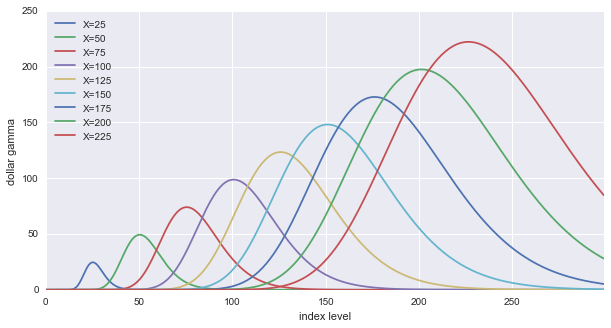

In [6]:
# We can visually confirm that the dollar gamma is greatest at the strike and decays as we move away respectively
# for each strike.
dollar_gamma.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('dollar gamma');

In [7]:
# If we consider this our portfolio, we can view the dollar gamma exposure on a portfolio basis by summing the 
# exposures per level.
dollar_gamma["portfolio_gamma"] = dollar_gamma.sum(axis=1)

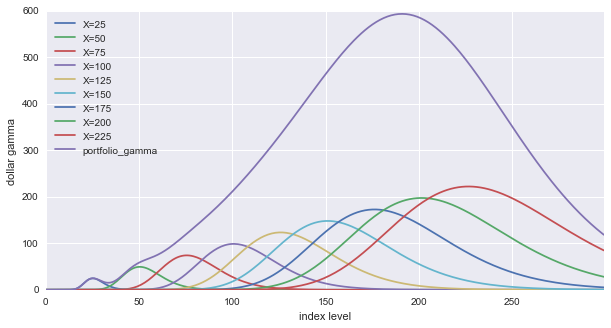

In [8]:
dollar_gamma.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('dollar gamma');

In [9]:
# The above worked under the assumption that we hold 1 unit of strike.
# We evaluate the outcome when we consider 1/X units.

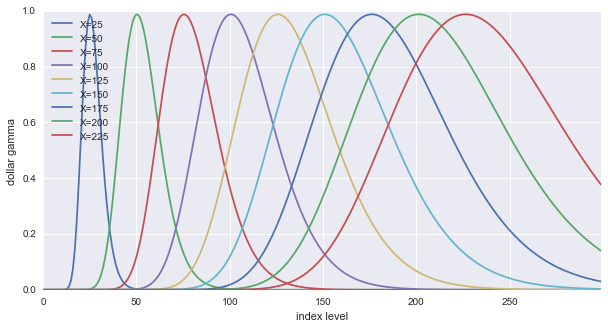

In [10]:
dollar_gamma_X = pd.DataFrame()
for X in strike_range:
    price = pricer.price(S_range, np.array([X]), v, d, t, op_type, greeks=True)
    dollar_gamma_X['X=%d'%X] = get_dollar_gamma(pricer.gamma, S_range)/X

dollar_gamma_X.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('dollar gamma');

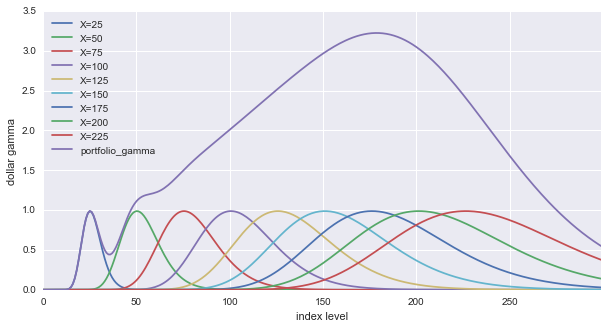

In [11]:
dollar_gamma_X["portfolio_gamma"] = dollar_gamma_X.sum(axis=1)
dollar_gamma_X.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('dollar gamma');

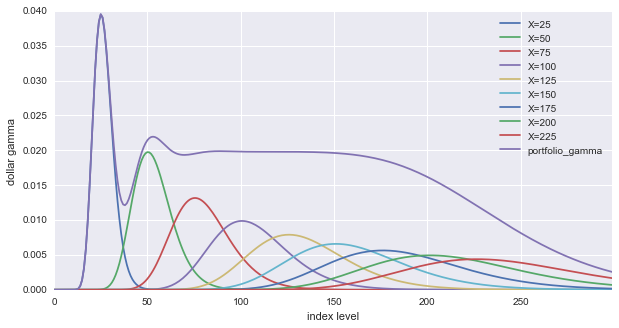

In [12]:
dollar_gamma_X2 = pd.DataFrame()
for X in strike_range:
    price = pricer.price(S_range, np.array([X]), v, d, t, op_type, greeks=True)
    dollar_gamma_X2['X=%d'%X] = get_dollar_gamma(pricer.gamma, S_range)/(X**2)

dollar_gamma_X2["portfolio_gamma"] = dollar_gamma_X2.sum(axis=1)
dollar_gamma_X2.plot(figsize=(10, 5));
plt.xlabel('index level');
plt.ylabel('dollar gamma');

A weighting proportional to the inverse of the strike results in a linear dollar gamma profile at certain points, while the inverse of the strike^2 results in a constant dollar gamma profile between 100 and 150. To obtain a constant exposure across all levels of indices, we would need an infinite number of units spread across a continuum between o and infinity...